# Injectivity t/hr.bar

Injectivity is the massrate ()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interactive, Layout, FloatSlider
from utilities import* # functions in the utilities.py file

Because the cell below includes all steps required to import and mudge the data (everything from notebook 1), it will take a little while to run. 

In [2]:
flowrate = read_flowrate(r'Data-FlowRate.xlsx')
pts = read_pts(r'Data-PTS.xlsx')

In [3]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101293 entries, 0 to 101292
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   depth_m        101293 non-null  float64       
 1   speed_mps      101208 non-null  float64       
 2   cweight_kg     101293 non-null  float64       
 3   whp_barg       101293 non-null  float64       
 4   temp_degC      101293 non-null  float64       
 5   pressure_bara  101293 non-null  float64       
 6   frequency_hz   94238 non-null   float64       
 7   datetime       101293 non-null  datetime64[ns]
 8   timestamp      101293 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.0 MB


In [4]:
flowrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   711 non-null    datetime64[ns]
 1   flow_tph   711 non-null    float64       
 2   timestamp  711 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.8 KB


Use the interactive plot to select the times within the completion test program when the pressure down-hole is most likely to be stable for a given flow rate

In [5]:
#from ipywidgets import interactive, Layout, FloatSlider
# fix legend display here and in other figures

min_timestamp = pts.timestamp.iloc[0]
max_timestamp = pts.timestamp.iloc[-1]

def subselect_plot(first_value, second_value, third_value):
    f,ax1 = plt.subplots(1,1, figsize = (20,6))
    ax1.plot(pts.timestamp, pts.depth_m, c = 'k', label = 'PTS tool depth')
    ax2 = ax1.twinx()
    ax2.plot(flowrate.timestamp, flowrate.flow_tph, c='k', linestyle = ':', label='Surface pump flowrate')
    ymin = pts.depth_m.min()
    ymax = pts.depth_m.max() + 100
    ax1.vlines(first_value, ymin, ymax, color='tab:green')
    ax1.vlines(second_value, ymin, ymax, color='tab:orange')
    ax1.vlines(third_value, ymin, ymax, color='tab:red')
    ax1.set_ylim(pts.depth_m.max() + 100, 0)

result = interactive(subselect_plot,
         
         first_value = FloatSlider
         (
             value = (max_timestamp - min_timestamp)/6 + min_timestamp,
             description = '1st value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%'),
             ),
          
          second_value = FloatSlider
          (
             value = (max_timestamp - min_timestamp)/4 + min_timestamp, 
             description = '2nd value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%')
             ),

          third_value = FloatSlider
          (
             value = (max_timestamp - min_timestamp)/2 + min_timestamp, 
             description = '3rd value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%')
             )
)

display(result);


interactive(children=(FloatSlider(value=1607636262.096, description='1st value', layout=Layout(width='80%'), m…

After you place the 1st (green), 2nd (orange), and 3rd (red) line locations, run the cell below to call the results. 

In [6]:
# extract pressure and flow rate at the marked points
print(
    '1st value =',result.children[0].value, ' which is', datetime.fromtimestamp(result.children[0].value), 
    '\n 2nd value =', result.children[1].value, ' which is', datetime.fromtimestamp(result.children[1].value),
    '\n 3rd value =', result.children[2].value, ' which is', datetime.fromtimestamp(result.children[2].value),
    )


1st value = 1607636262.096  which is 2020-12-11 10:37:42.096000 
 2nd value = 1607638390.92  which is 2020-12-11 11:13:10.920000 
 3rd value = 1607644777.392  which is 2020-12-11 12:59:37.392000


Because result.children will change each time you move the sliders in the plot above or re-run this Jupyter Notebook, we copy-paste our selection below. This records your choice and will be the values you do the rest of the interpretation with. 

### My selected data

1st value = 1607641784.448  which is 2020-12-11 12:09:44.448000

2nd value = 1607650624.448  which is 2020-12-11 14:37:04.448000
 
3rd value = 1607655614.448  which is 2020-12-11 16:00:14.448000

In [7]:
# my selected data as objects

first_timestamp = 1607641784.448
second_timestamp = 1607650624.448
third_timestamp = 1607655614.448

In [8]:
def find_index(value, df, colname):
    '''
    Find the dataframe index for the exact matching value or nearest two values

    args:   value: (float or int) the search term
            df: (obj) the name of the dataframe that is searched
            colname: (str) the name of the coloum this is searched

    returns:  dataframe index(s) for the matching value or the two adjacent values
              rows can be called from a df using df.iloc[[index_number,index_number]]
    '''
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_index = df[df[colname] < value][colname].idxmax()
        upperneighbour_index = df[df[colname] > value][colname].idxmin()
        return [lowerneighbour_index, upperneighbour_index] 

In [9]:
# make new pts df that has values adjacent my selected value

first_pts = pts.iloc[find_index(first_timestamp, pts, 'timestamp')]
second_pts = pts.iloc[find_index(second_timestamp, pts, 'timestamp')]
third_pts = pts.iloc[find_index(third_timestamp, pts, 'timestamp')]

first_pts

,depth_m,speed_mps,cweight_kg,whp_barg,temp_degC,pressure_bara,frequency_hz,datetime,timestamp
38824,779.7876,0.0,142.43704,-0.614043,50.532658,37.737960,4.297326,2020-12-11 12:09:44.064,1.607642e+09
38827,779.7876,0.0,142.42804,-0.613947,50.553417,37.723953,4.065515,2020-12-11 12:09:44.928,1.607642e+09


In [10]:
# make an array of the mean pressure values
import numpy as np

list = []
for df in [first_pts, second_pts, third_pts]:
    mean_pressure = df['pressure_bara'].mean()
    list.append(mean_pressure)
pressure_array = np.array(list)

print('pressure data =', pressure_array)
print('object type =', type(pressure_array))


pressure data = [37.7309565 37.605452  37.187458 ]
object type = <class 'numpy.ndarray'>


In [11]:
# make new flowrate df that has values adjacent my selected value

first_flowrate = flowrate.iloc[find_index(first_timestamp, flowrate, 'timestamp')]
second_flowrate = flowrate.iloc[find_index(second_timestamp, flowrate, 'timestamp')]
third_flowrate = flowrate.iloc[find_index(third_timestamp, flowrate, 'timestamp')]
first_flowrate

,datetime,flow_tph,timestamp
363,2020-12-11 12:09:00,122.166929,1.607642e+09
364,2020-12-11 12:10:00,122.713843,1.607642e+09


In [12]:
# make an array of the mean flowrate values

list = []
for df in [first_flowrate, second_flowrate, third_flowrate]:
    mean_flowrate = df['flow_tph'].mean()
    list.append(mean_flowrate)
flowrate_array = np.array(list)

print('flowrate data =', flowrate_array)
print('object type =', type(flowrate_array))

flowrate data = [122.44038576  92.66775147   0.        ]
object type = <class 'numpy.ndarray'>


In [13]:
from numpy.polynomial.polynomial import polyfit

# calculate the linear fit to the pressure and flowrate arrays
polyfit_b, polyfit_m = polyfit(pressure_array, flowrate_array, 1)

# a fancy way to format strings that calls the objects polyfit_b and polyfit_m
print("The numpy polyfit linear model for our data: y = {:.5} + {:.5}X"
      .format(polyfit_b, polyfit_m))


The numpy polyfit linear model for our data: y = -8344.3 + 224.38X


Text(0.5, 0, 'Pressure [bara]')

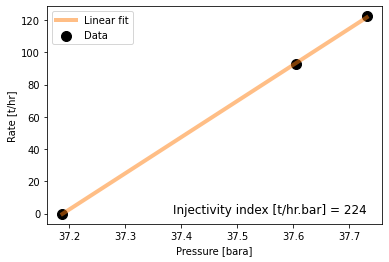

In [14]:
f,ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(pressure_array, flowrate_array, 
           s=100, c='k', label = 'Data')

ax.plot(pressure_array, # x values
    polyfit_m * pressure_array + polyfit_b, # use the model to generate y values
    color='tab:orange', linestyle='-', linewidth=4, alpha=0.5, label='Linear fit')

ax.text(pressure_array[0],flowrate_array[2], 
    "Injectivity index [t/hr.bar] = {:}".format(round(polyfit_m)), 
    fontsize = 12, horizontalalignment='right')

ax.legend()
ax.set_ylabel('Rate [t/hr]')
ax.set_xlabel('Pressure [bara]')  

**Include the adapted version of MAG's II plot**

***

<p><center>© 2021 <a href="https://www.cubicearth.nz/">Irene Wallis</a> and <a href="https://www.linkedin.com/in/katie-mclean-25994315/">Katie McLean</a> <a href="https://creativecommons.org/licenses/by/4.0/"</a></center></p>

<p><center>Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at <a href="http://www.apache.org/licenses/LICENSE-2.0">http://www.apache.org/licenses/LICENSE-2.0</a></center></p>

<p><center>Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.</center></p>

***